In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cheese_data.csv to cheese_data (2).csv


In [ ]:
#loading Canadian Cheese directory
cheese_df = pd.read_csv("cheese_data.csv")
cheese_df.head(3)
cheese_df.head()
cheese_df.info()
cheese_df.isnull().sum()
cheese_df =clean_cheese_data(cheese_df)
cheese_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   ManufacturingTypeEn   1042 non-null   object 
 3   MoisturePercent       1028 non-null   float64
 4   FlavourEn             801 non-null    object 
 5   CharacteristicsEn     643 non-null    object 
 6   Organic               1042 non-null   int64  
 7   CategoryTypeEn        1019 non-null   object 
 8   MilkTypeEn            1041 non-null   object 
 9   MilkTreatmentTypeEn   977 non-null    object 
 10  RindTypeEn            721 non-null    object 
 11  CheeseName            1042 non-null   object 
 12  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 106.0+ KB


,CheeseId,Province,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Is Organic,Category,Milk Type,MilkTreatmentTypeEn,RindTypeEn,Cheese,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving canada_weather.csv to canada_weather (1).csv


In [ ]:
weather_df = pd.read_csv("canada_weather.csv")
weather_df.head(3)
weather_df.head()
weather_df.info()
#removing null values
weather_df.isnull().sum()
#clearing data and extracting values in celsius
def extract_celsius(value):
    try:
        return float(value.split(' ')[0])
    except:
        return None
for col in ['January(Avg. high °C (°F))', 'January(Avg. low °C (°F))',
            'July(Avg. high °C (°F))', 'July(Avg. low °C (°F))',
            'Annual(Avg. high °C (°F))', 'Annual(Avg. low °C (°F))']:
    #getting mean value for weather
    weather_df[col] = weather_df[col].apply(extract_celsius)
weather_df["Annual Avg Temp (°C)"] = (
    weather_df["Annual(Avg. high °C (°F))"] +
    weather_df["Annual(Avg. low °C (°F))"]
) / 2
community_to_province = {
    "Calgary": "AB",
    "Edmonton": "AB",
    "Vancouver": "BC",
    "Victoria": "BC",
    "Winnipeg": "MB",
    "Fredericton": "NB",
    "St. John's": "NL",
    "Halifax": "NS",
    "Toronto": "ON",
    "Ottawa": "ON",
    "Charlottetown": "PE",
    "Québec": "QC",
    "Montreal": "QC",
    "Regina": "SK",
    "Saskatoon": "SK",
    "Whitehorse": "YT",
    "Yellowknife": "NT",
    "Iqaluit": "NU"
}
weather_df["Province"] = weather_df["Community"].map(community_to_province)
province_temp_df = weather_df.groupby("Province")["Annual Avg Temp (°C)"].mean().reset_index()

province_temp_df
def clean_cheese_data(df):
    df = df.rename(columns={
        "ManufacturerProvCode": "Province",
        "CheeseName": "Cheese",
        "CategoryTypeEn": "Category",
        "MilkTypeEn": "Milk Type",
        "Organic": "Is Organic"
    })
    df["Province"] = df["Province"].str.strip().str.upper()
    df = df.dropna(subset=["Province", "Cheese"])
    df["Category"].fillna("Unknown", inplace=True)
    df["Milk Type"].fillna("Unknown", inplace=True)
    df.drop_duplicates(inplace=True)
    return df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Community                   43 non-null     object
 1   Weather station             40 non-null     object
 2   Location                    43 non-null     object
 3   Elevation                   43 non-null     object
 4   January(Avg. high °C (°F))  43 non-null     object
 5   January(Avg. low °C (°F))   43 non-null     object
 6   July(Avg. high °C (°F))     43 non-null     object
 7   July(Avg. low °C (°F))      43 non-null     object
 8   Annual(Avg. high °C (°F))   43 non-null     object
 9   Annual(Avg. low °C (°F))    43 non-null     object
dtypes: object(10)
memory usage: 3.5+ KB


In [ ]:
merged_df = cheese_df.merge(province_temp_df, on="Province", how="inner")
#merged cheese_df for province names

In [ ]:
weather_df["Province"] = weather_df["Community"].map(community_to_province)
print("Unmapped Communities:\n", weather_df[weather_df["Province"].isnull()]["Community"].unique())
#checking for errors

Unmapped Communities:
 ['Alberton, PE' 'Baker Lake, NU' 'Baie-Comeau, QC' 'Calgary, AB'
 'Charlottetown, PE' 'Churchill, MB' 'Corner Brook, NL' 'Dawson City, YT'
 'Edmonton, AB' 'Edmundston, NB' 'Fort Nelson, BC' 'Fredericton, NB'
 'Halifax, NS' 'High Level, AB' 'Inuvik, NT' 'Iqaluit, NU' 'Kamloops, BC'
 'Kugluktuk, NU' 'La Ronge, SK' 'Mayo, YT' 'Moncton, NB' 'Montreal, QC'
 'Nain, NL' 'Norman Wells, NT' 'Ottawa, ON' 'Princeton, BC'
 'Quebec City, QC' 'Regina, SK' 'Resolute, NU' 'Saskatoon, SK'
 "St. John's, NL" 'Summerside, PE' 'Sydney, NS' 'Thompson, MB'
 'Timmins, ON' 'Toronto, ON' 'Vancouver, BC' 'Victoria, BC'
 'Whitehorse, YT' 'Windsor, ON' 'Winnipeg, MB' 'Yarmouth, NS'
 'Yellowknife, NT']


In [ ]:
weather_df["Community"] = weather_df["Community"].str.strip().str.title()
weather_df["Province"] = weather_df["Community"].map(community_to_province)


In [ ]:
province_temp_df = weather_df.groupby("Province")["Annual Avg Temp (°C)"].mean().reset_index()


In [ ]:
print(sorted(weather_df["Community"].unique()))

['Alberton, Pe', 'Baie-Comeau, Qc', 'Baker Lake, Nu', 'Calgary, Ab', 'Charlottetown, Pe', 'Churchill, Mb', 'Corner Brook, Nl', 'Dawson City, Yt', 'Edmonton, Ab', 'Edmundston, Nb', 'Fort Nelson, Bc', 'Fredericton, Nb', 'Halifax, Ns', 'High Level, Ab', 'Inuvik, Nt', 'Iqaluit, Nu', 'Kamloops, Bc', 'Kugluktuk, Nu', 'La Ronge, Sk', 'Mayo, Yt', 'Moncton, Nb', 'Montreal, Qc', 'Nain, Nl', 'Norman Wells, Nt', 'Ottawa, On', 'Princeton, Bc', 'Quebec City, Qc', 'Regina, Sk', 'Resolute, Nu', 'Saskatoon, Sk', "St. John'S, Nl", 'Summerside, Pe', 'Sydney, Ns', 'Thompson, Mb', 'Timmins, On', 'Toronto, On', 'Vancouver, Bc', 'Victoria, Bc', 'Whitehorse, Yt', 'Windsor, On', 'Winnipeg, Mb', 'Yarmouth, Ns', 'Yellowknife, Nt']


In [ ]:
print(weather_df["Province"].isnull().sum())  # should be small or 0
print(weather_df[weather_df["Province"].isnull()]["Community"].unique())  # check unmatched
weather_df["Province"] = weather_df["Community"].str.extract(r",\s*([A-Za-z]{2})")[0].str.upper()


province_temp_df = weather_df.groupby("Province")["Annual Avg Temp (°C)"].mean().reset_index()
print(sorted(province_temp_df["Province"]))

43
['Alberton, Pe' 'Baker Lake, Nu' 'Baie-Comeau, Qc' 'Calgary, Ab'
 'Charlottetown, Pe' 'Churchill, Mb' 'Corner Brook, Nl' 'Dawson City, Yt'
 'Edmonton, Ab' 'Edmundston, Nb' 'Fort Nelson, Bc' 'Fredericton, Nb'
 'Halifax, Ns' 'High Level, Ab' 'Inuvik, Nt' 'Iqaluit, Nu' 'Kamloops, Bc'
 'Kugluktuk, Nu' 'La Ronge, Sk' 'Mayo, Yt' 'Moncton, Nb' 'Montreal, Qc'
 'Nain, Nl' 'Norman Wells, Nt' 'Ottawa, On' 'Princeton, Bc'
 'Quebec City, Qc' 'Regina, Sk' 'Resolute, Nu' 'Saskatoon, Sk'
 "St. John'S, Nl" 'Summerside, Pe' 'Sydney, Ns' 'Thompson, Mb'
 'Timmins, On' 'Toronto, On' 'Vancouver, Bc' 'Victoria, Bc'
 'Whitehorse, Yt' 'Windsor, On' 'Winnipeg, Mb' 'Yarmouth, Ns'
 'Yellowknife, Nt']
['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


In [ ]:
merged_df = cheese_df.merge(province_temp_df, on="Province", how="inner")
print(merged_df.shape)
merged_df.head()

(1042, 14)


,CheeseId,Province,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Is Organic,Category,Milk Type,MilkTreatmentTypeEn,RindTypeEn,Cheese,FatLevel,Annual Avg Temp (°C)
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat,5.400000
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat,5.400000
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat,8.133333
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat,5.400000
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat,5.400000


In [ ]:
print("Weather provinces:", sorted(province_temp_df["Province"].unique()))

Weather provinces: ['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


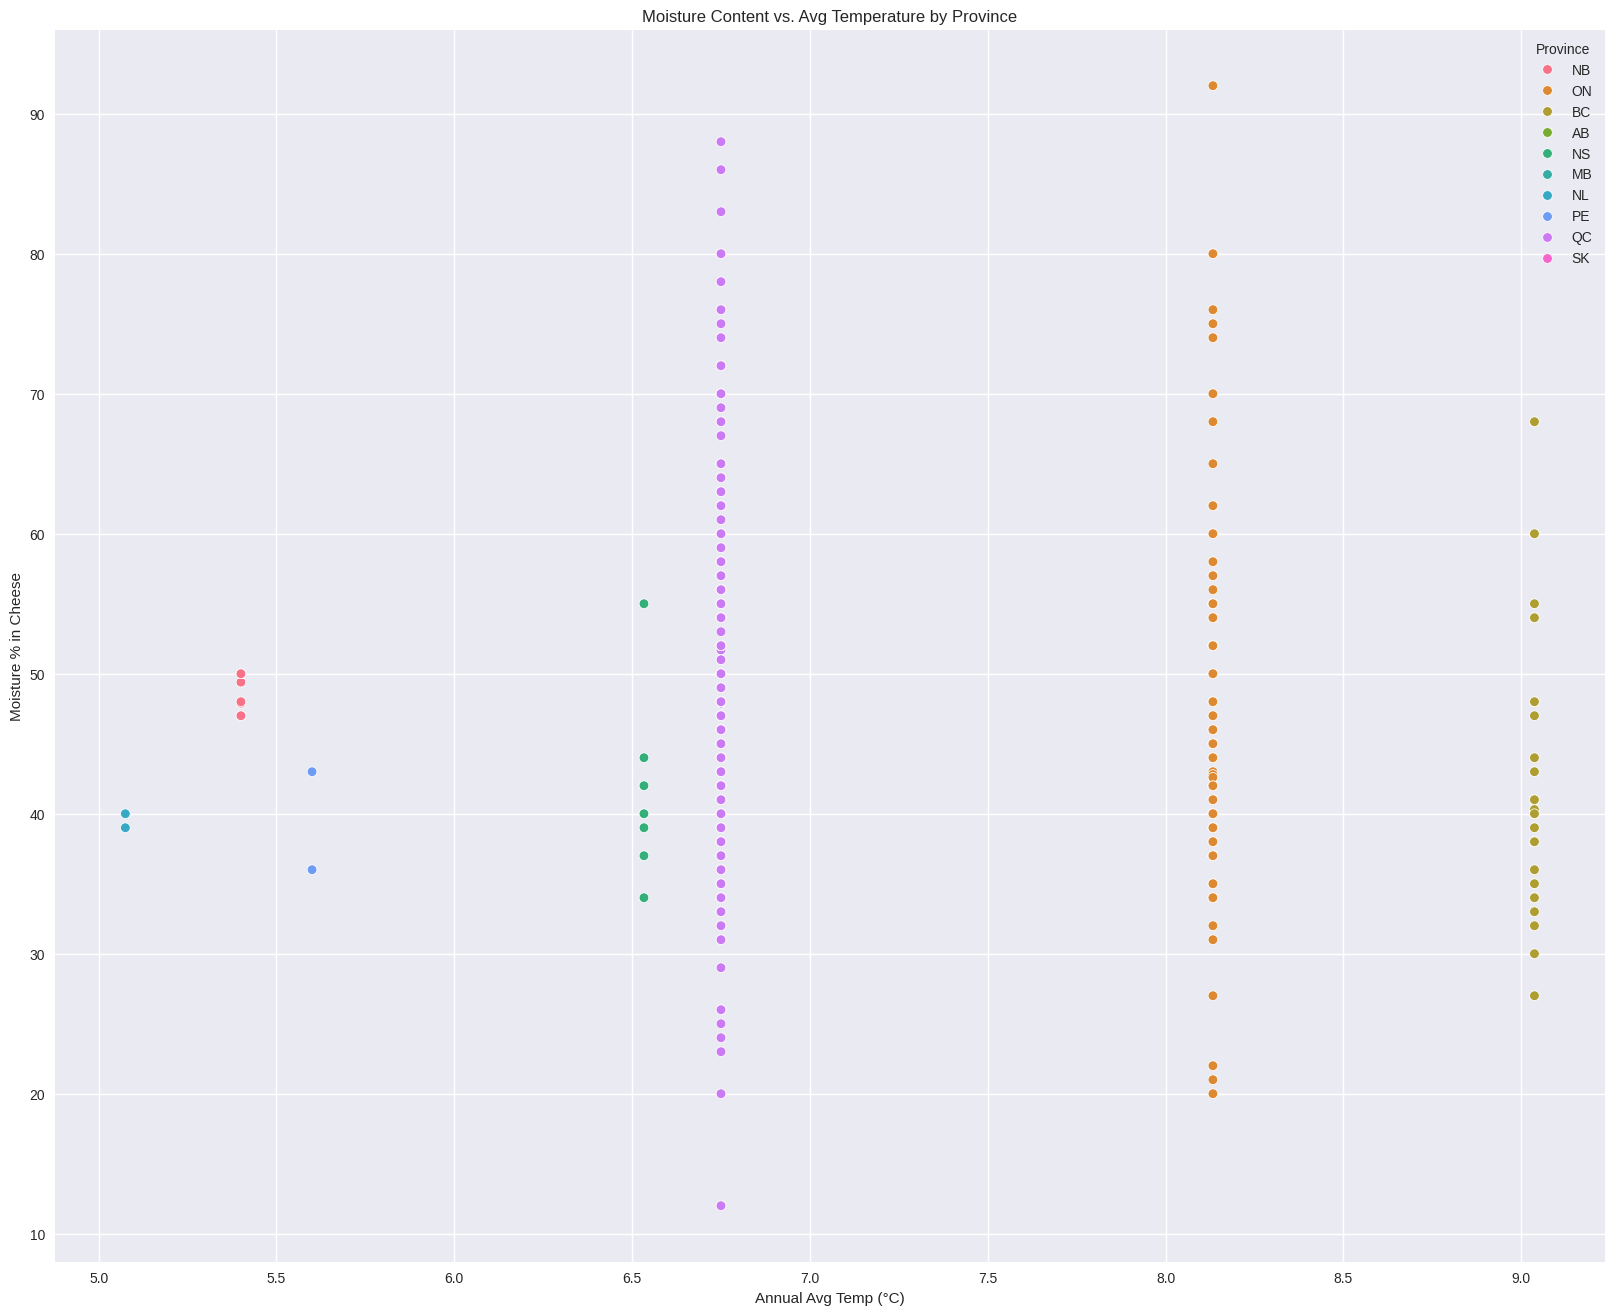

In [ ]:
plt.figure(figsize=(20, 16))
sns.scatterplot(data=merged_df, x="Annual Avg Temp (°C)", y="MoisturePercent", hue="Province")
plt.title("Moisture Content vs. Avg Temperature by Province")
plt.xlabel("Annual Avg Temp (°C)")
plt.ylabel("Moisture % in Cheese")
plt.grid(True)
plt.show()
#from outcome of this graph it can be concluded that provinces with average temperature of 6C to 8.5 c are likely to have high moisture in their cheese

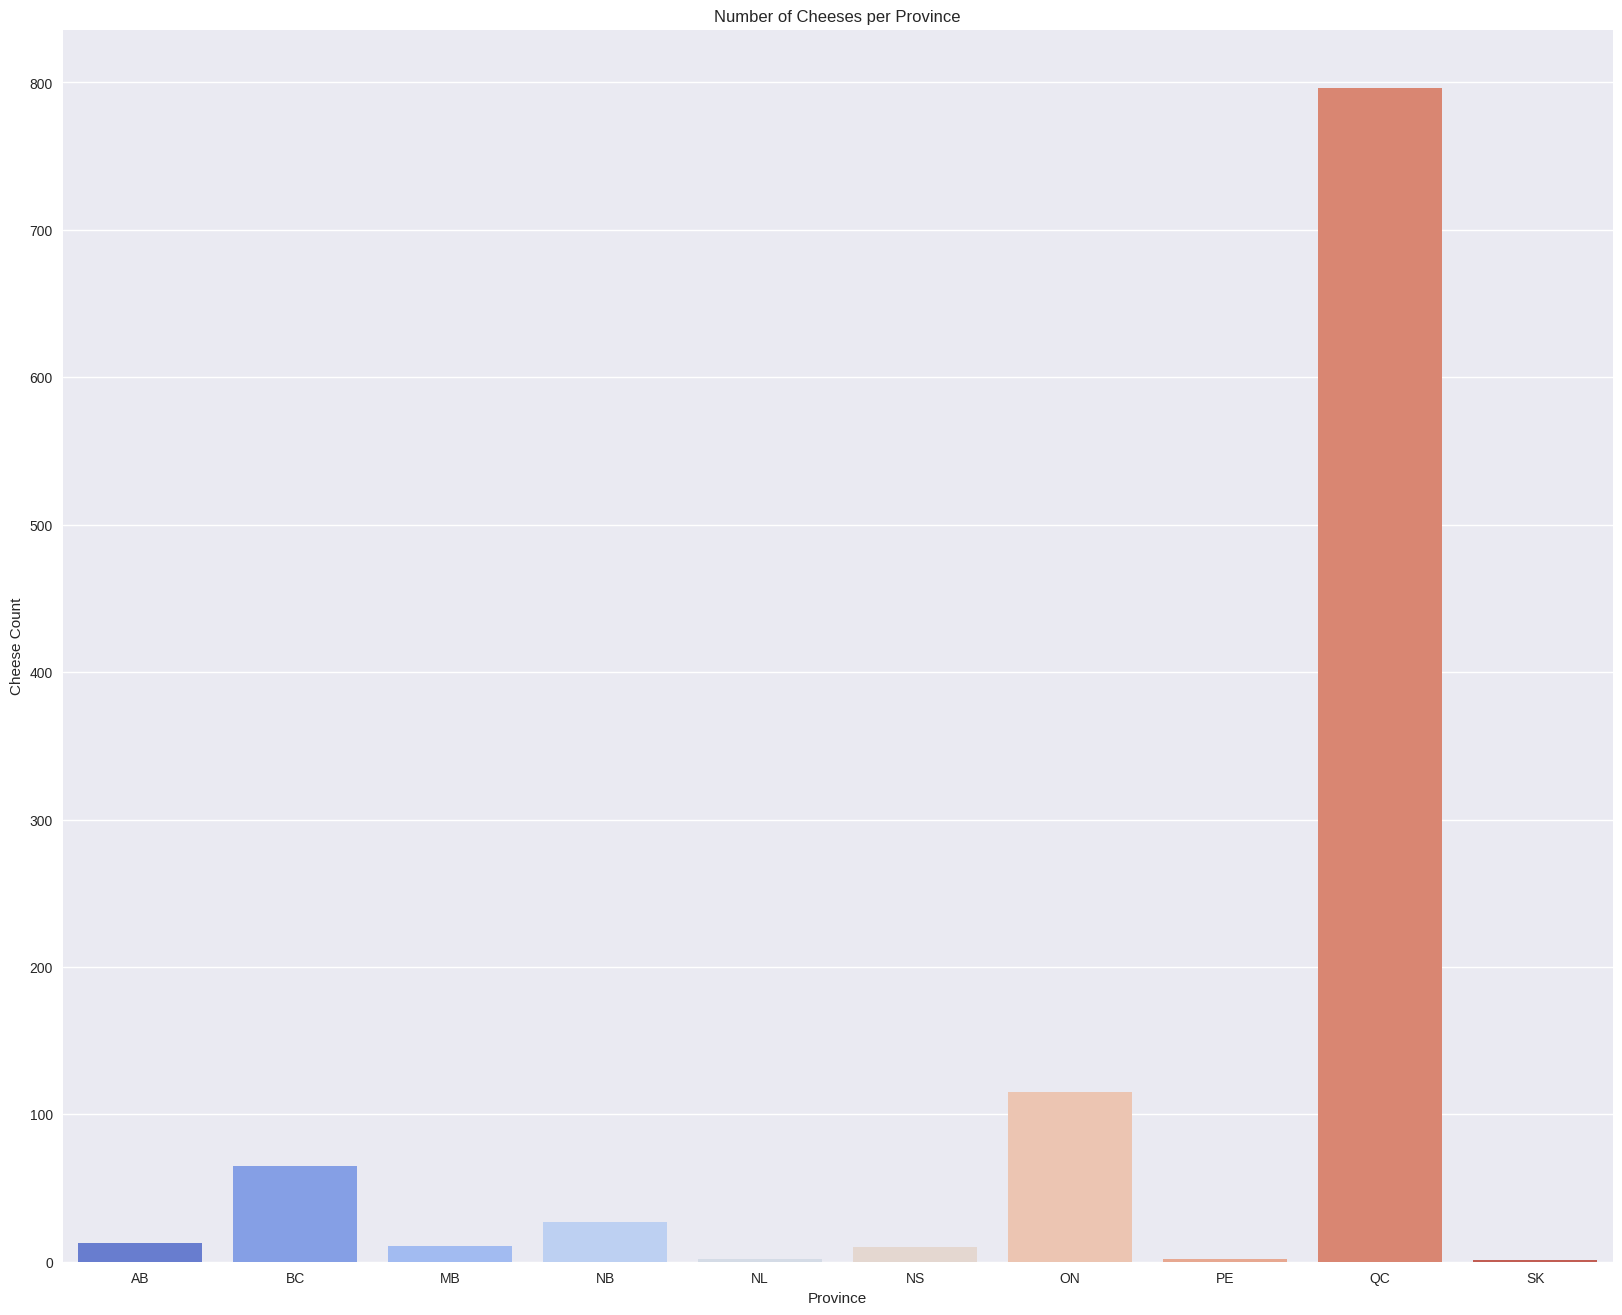

In [ ]:
cheese_counts = merged_df.groupby("Province")["Cheese"].count().reset_index(name="Cheese Count")
cheese_temp_df = cheese_counts.merge(province_temp_df, on="Province")
#plotting graph
plt.figure(figsize=(20, 16))
sns.barplot(data=cheese_temp_df, x="Province", y="Cheese Count", palette="coolwarm")
plt.title("Number of Cheeses per Province")
plt.ylabel("Cheese Count")
plt.xlabel("Province")
plt.show()



Qc turns out to be highest producer in number of cheese followed by On and BC, it can be said that provinces with 
higher temperature and colder average annual temperature tends to produce less amount of cheese.                                                      🧀This analysis demonstrates a clear relationship between Canadian provincial climates and cheese production characteristics. Warmer provinces show greater diversity in cheese types and milk sources

In [ ]:
# Group by Province and Milk Type and count the occurrences
milk_type_province_counts = merged_df.groupby(["Province", "Milk Type"]).size().reset_index(name="Count")

# Display the results
print("Milk Type Distribution by Province:")
print(milk_type_province_counts)

# Pivot the table for better readability
milk_type_province_pivot = milk_type_province_counts.pivot_table(index="Province", columns="Milk Type", values="Count", fill_value=0)
print("\nPivoted Milk Type Distribution by Province:")
print(milk_type_province_pivot)

Milk Type Distribution by Province:
   Province          Milk Type  Count
0        AB                Cow      9
1        AB       Cow and Goat      1
2        AB        Ewe and Cow      1
3        AB               Goat      1
4        AB            Unknown      1
5        BC                Cow     52
6        BC                Ewe      1
7        BC               Goat     12
8        MB                Cow     11
9        NB                Cow      4
10       NB                Ewe      1
11       NB               Goat     22
12       NL                Cow      2
13       NS                Cow      8
14       NS                Ewe      2
15       ON                Cow     77
16       ON       Cow and Goat      1
17       ON                Ewe     14
18       ON               Goat     23
19       PE                Cow      2
20       QC        Buffalo Cow      2
21       QC                Cow    577
22       QC       Cow and Goat     11
23       QC  Cow, Goat and Ewe      1
24       QC   

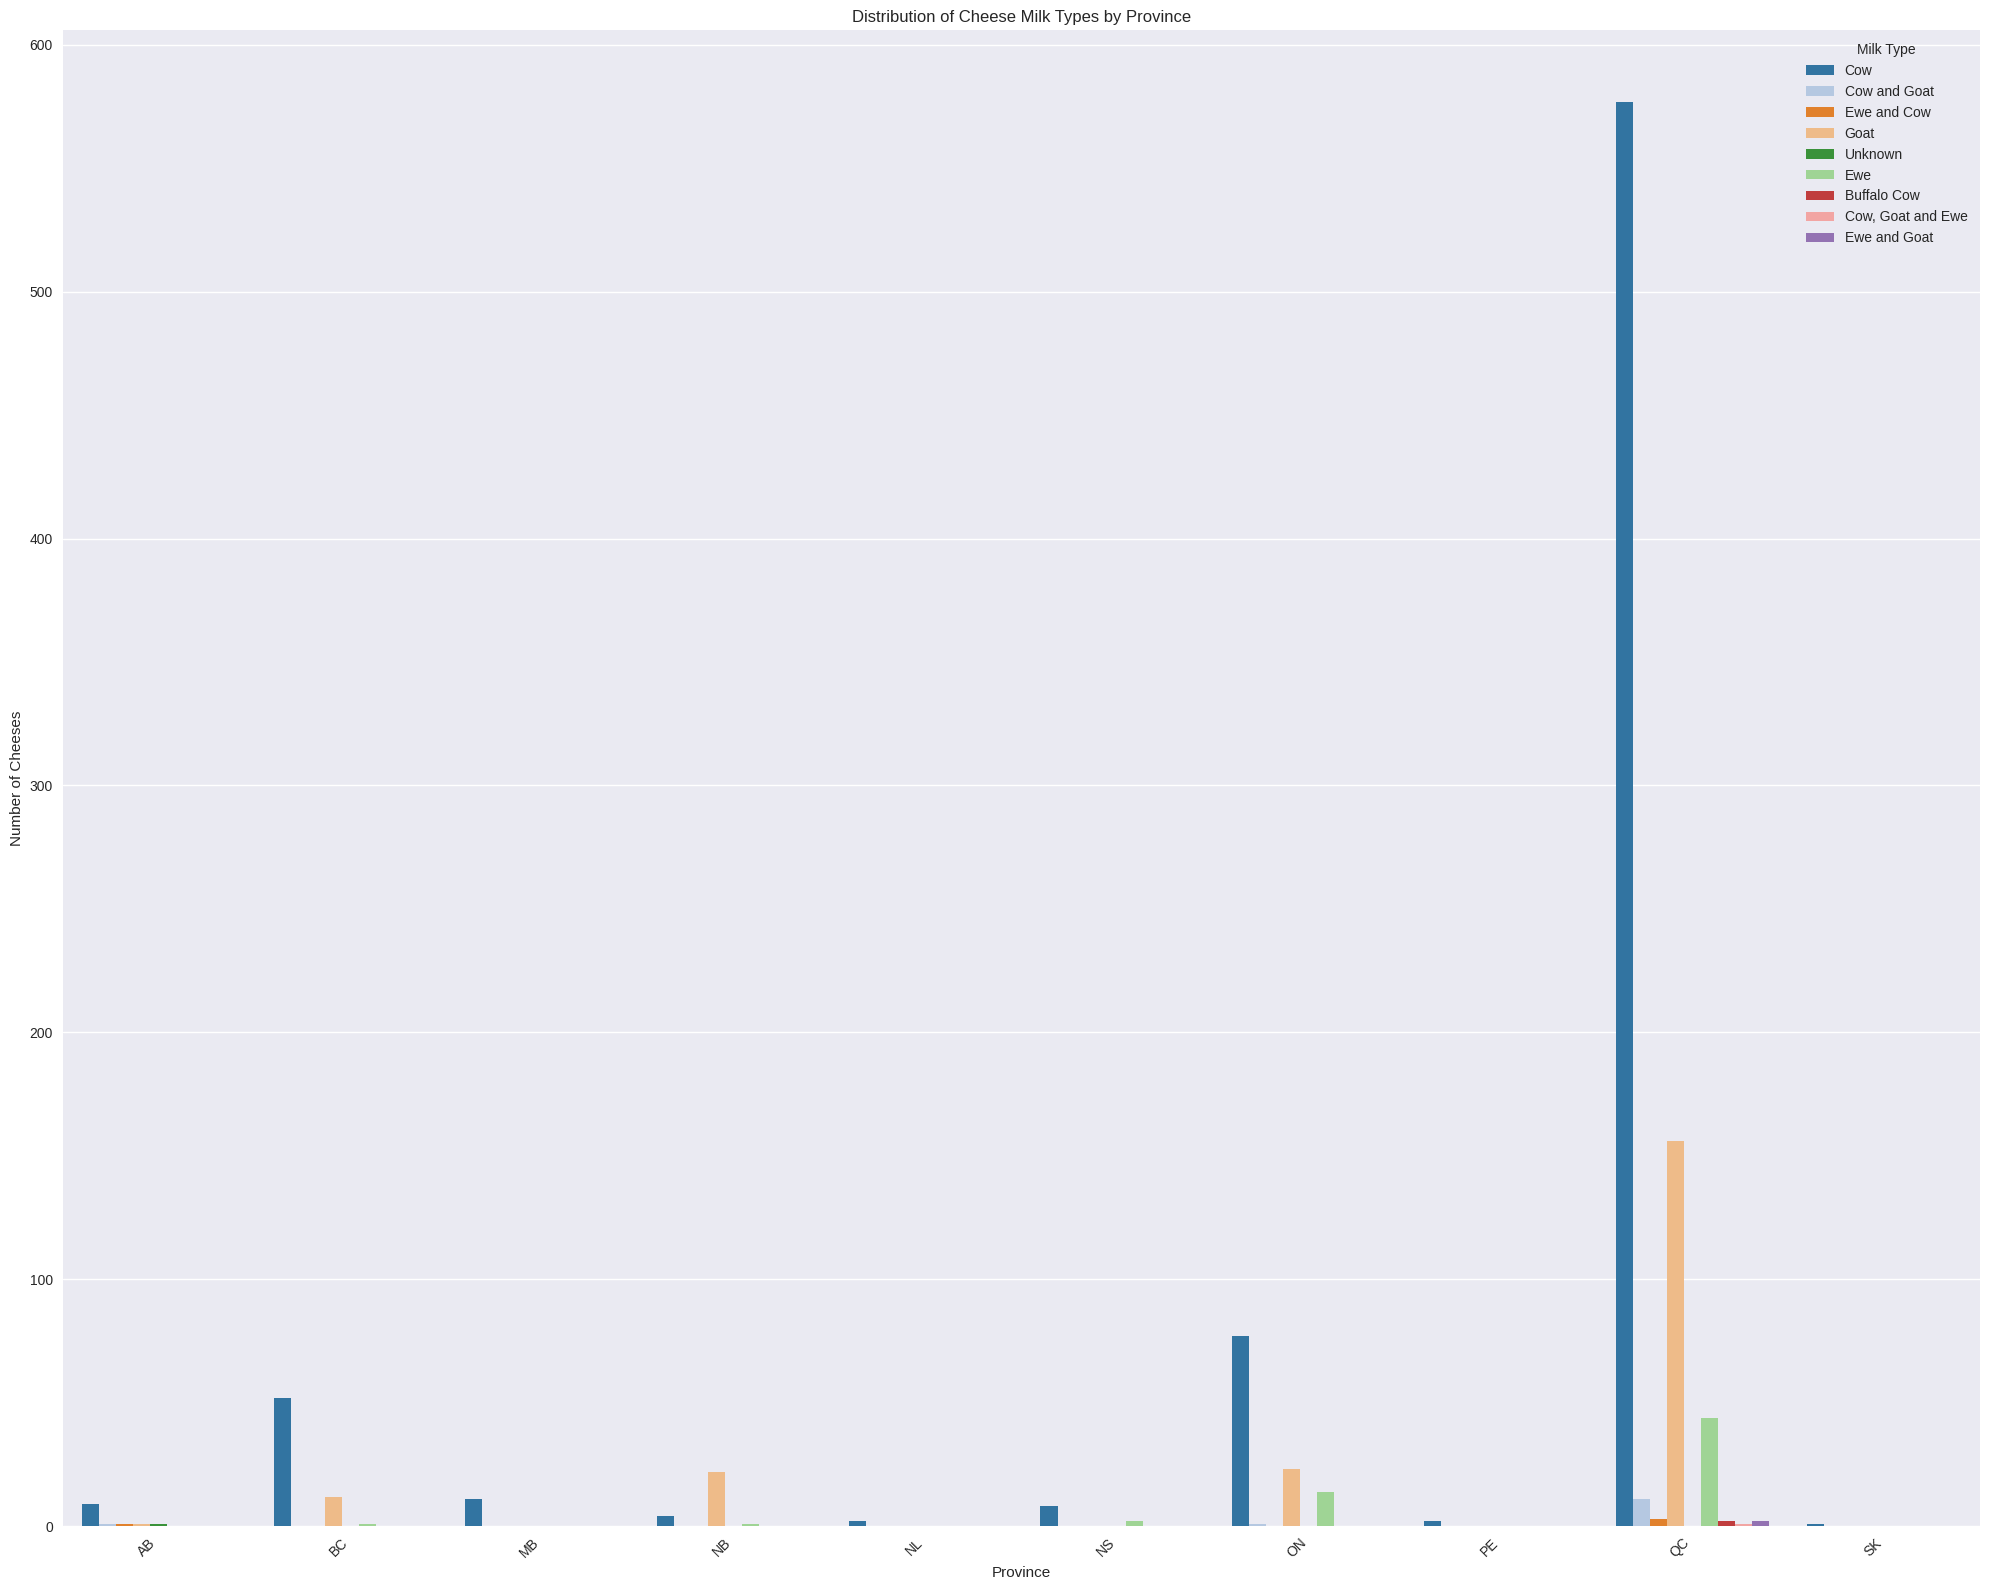

In [ ]:
milk_type_province_counts = merged_df.groupby(["Province", "Milk Type"]).size().reset_index(name="Count")

# Create a stacked bar chart
plt.figure(figsize=(20, 16)) # Adjust figure size as needed
sns.barplot(
    data=milk_type_province_counts,
    x="Province",
    y="Count",
    hue="Milk Type",  # This creates the stacks based on Milk Type
    palette="tab20" 
)

plt.title("Distribution of Cheese Milk Types by Province")
plt.xlabel("Province")
plt.ylabel("Number of Cheeses")
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better readability
plt.legend(title="Milk Type")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()
# In most provinces Cows are major contributer for making cheese but it is interesting to note that few provinces uses Ewe and goat milk as a source as well.

🧀 **Cow milk** dominates across all provinces, especially Quebec (QC) and Ontario (ON).
- 🐐 **Goat milk** is notably popular in BC, ON, and NB.
- 🐑 **Ewe milk** is less common and appears in artisanal or specialty products.
- 🥛 Mixed types like *Cow and Goat* or *Buffalo Cow* are rare but suggest regional specialty cheeses.
- ❄️ Provinces like QC and ON have a higher cheese diversity and volume